In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer (for 10 classes)
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18432)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       2,359,424 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,453,962 (9.36 MB)

 Trainable params: 2,453,962 (9.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3848 - loss: 1.6662 - val_accuracy: 0.5829 - val_loss: 1.1778
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 50ms/step - accuracy: 0.6095 - loss: 1.1091 - val_accuracy: 0.6491 - val_loss: 0.9813
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.6862 - loss: 0.8991 - val_accuracy: 0.6818 - val_loss: 0.9155
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.7258 - loss: 0.7818 - val_accuracy: 0.6854 - val_loss: 0.9131
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 50ms/step - accuracy: 0.7606 - loss: 0.6851 - val_accuracy: 0.6970 - val_loss: 0.9094
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 87s 54ms/step - accuracy: 0.7935 - loss: 0.5961 - val_accuracy: 0.7222 - val_loss: 0.8297
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 135s 49ms/step - accuracy: 0.8212 - loss: 0.5095 - val_accuracy: 0.7191 - val_loss: 0.8618
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 51ms/step - accuracy: 0.8401 

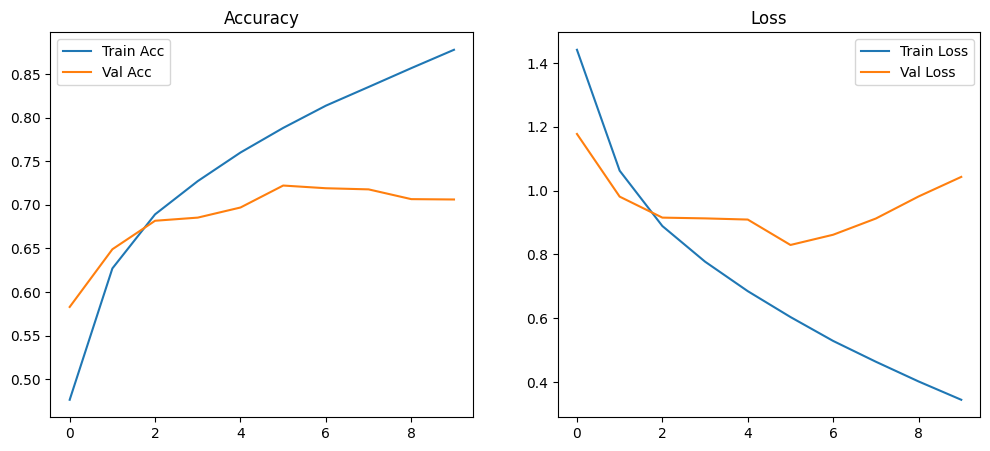

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step


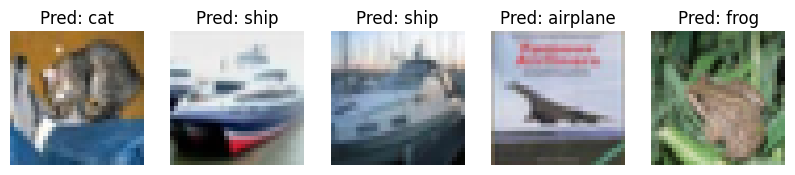

In [5]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values (0 to 1)
X_train, X_test = X_train / 255.0, X_test / 255.0

# Define CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

# Plot training accuracy and loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Loss')
plt.show()

# Make predictions
predictions = model.predict(X_test[:5])
predicted_classes = np.argmax(predictions, axis=1)

# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Show predictions
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i])
    ax.set_title(f"Pred: {class_names[predicted_classes[i]]}")
    ax.axis('off')
plt.show()


Saving kangaroo.webp to kangaroo.webp
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


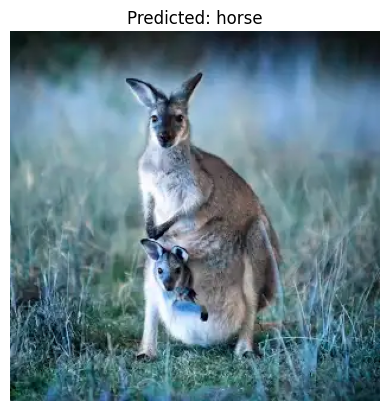

In [7]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab import files  # For uploading files

# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]

# Upload an image
uploaded = files.upload()  # Opens file picker

# Load and preprocess the image
for filename in uploaded.keys():
    img = cv2.imread(filename)  # Read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (32, 32))  # Resize to 32x32
    img = img / 255.0  # Normalize (same as training images)
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    # Display the image with the predicted label
    plt.imshow(cv2.imread(filename))
    plt.title(f"Predicted: {class_names[predicted_class]}")
    plt.axis("off")
    plt.show()
